In [288]:
from matplotlib import pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras import losses
from keras.utils import np_utils
from keras.optimizers import SGD
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import numpy as np
import cv2
from skimage import color
from skimage import io
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

First load fashion MNIST dataset

In [98]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

Check the shape of the dataset

In [313]:
print('Train: data=%s, target=%s' % (trainX.shape, trainy.shape))
print('Test: data=%s, target=%s' % (testX.shape, testy.shape))

Train: data=(60000, 28, 28), target=(60000,)
Test: data=(10000, 28, 28), target=(10000,)


Visualize first 10 train data points


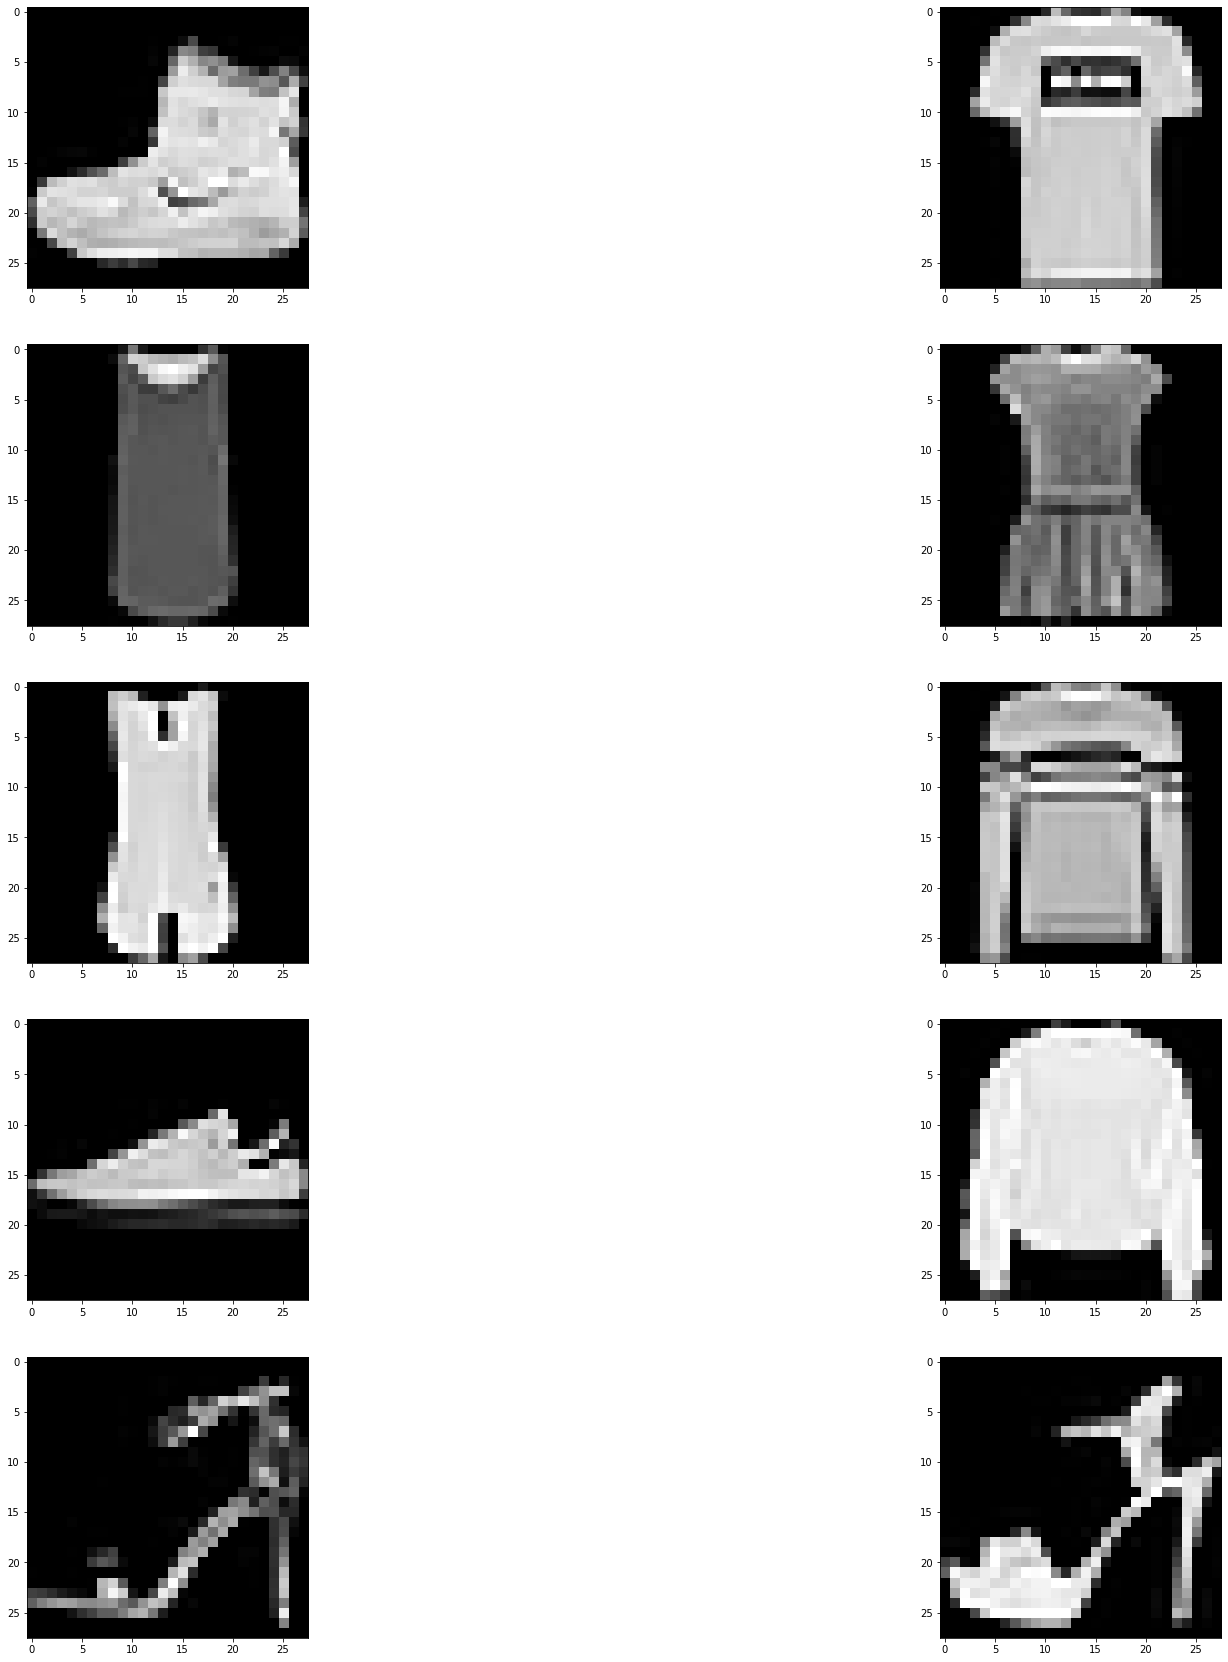

In [100]:
rows = 5
cols = 2
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(30,30))
index = 0; 

for i in range(rows):
    for j in range(cols):
        axes[i][j].imshow(trainX[index], cmap=plt.get_cmap('gray'))
        index = index + 1
        
plt.show()

Reshape the images from (60000, 28, 28) → (60000, 28, 28, 1)


In [101]:
X_train = np.expand_dims(trainX,-1)
X_test = np.expand_dims(testX,-1)

In [102]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [103]:
y_test= np_utils.to_categorical(testy)
y_train= np_utils.to_categorical(trainy)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


Build CNN-based classifier with the following architecture:
Convolutional layers:

▪ Convolutional layer: kernel size: 2×2, 64 kernels, "same" padding, ReLU
activation

▪ Max pooling layer with pool size = 2, and stride = 2

▪ Convolutional layer: kernel size: 2×2, 32 kernels, "same" padding, ReLU
activation

▪ Max pooling layer with pool size = 2, and stride = 2

▪ Flatten layer

▪ Dense layer with 256 neurons and ReLU activation

▪ Last dense layer with softmax activation

In [176]:
def Model_definition():
    model = Sequential()
    
    model.add(Conv2D(32, (2, 2), activation='relu', padding="same", input_shape = (28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
    model.add(Conv2D(64, (2, 2), activation='relu', padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
    model.add(Flatten())   
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    return model

In [177]:
def define_model():
    model = Model_definition()
    
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, 
                  metrics=['accuracy'],
                  loss = 'categorical_crossentropy')
    return model

### Test Run

In [281]:
model = define_model()

In [282]:
history2 = model.fit(X_train,
                     y_train,
                    epochs=2,
                    batch_size = 512,
                    verbose=1)

Epoch 1/2
118/118 [==============================] - 50s 418ms/step - loss: 1.3163 - accuracy: 0.5743
Epoch 2/2
118/118 [==============================] - 49s 416ms/step - loss: 0.4742 - accuracy: 0.8289


In [283]:
model.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_100 (MaxPoolin (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 27, 27, 64)        8256      
_________________________________________________________________
max_pooling2d_101 (MaxPoolin (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_50 (Flatten)         (None, 43264)             0         
_________________________________________________________________
dense_100 (Dense)            (None, 256)               11075840  
_________________________________________________________________
dense_101 (Dense)            (None, 10)              

In [284]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.4242 - accuracy: 0.8471


[0.4242010712623596, 0.847100019454956]

### Run with more epochs

In [172]:
model3 = define_model()
history2 = model3.fit(X_train,
                     y_train,
                    epochs=10,
                    batch_size = 512,
                    verbose=1)

Epoch 1/10
118/118 [==============================] - 55s 458ms/step - loss: 1.2428 - accuracy: 0.5913
Epoch 2/10
118/118 [==============================] - 53s 453ms/step - loss: 0.4853 - accuracy: 0.8214
Epoch 3/10
118/118 [==============================] - 55s 462ms/step - loss: 0.4012 - accuracy: 0.8578
Epoch 4/10
118/118 [==============================] - 56s 476ms/step - loss: 0.3678 - accuracy: 0.8705
Epoch 5/10
118/118 [==============================] - 57s 482ms/step - loss: 0.3363 - accuracy: 0.8807
Epoch 6/10
118/118 [==============================] - 53s 448ms/step - loss: 0.3151 - accuracy: 0.8891
Epoch 7/10
118/118 [==============================] - 54s 460ms/step - loss: 0.3018 - accuracy: 0.8937
Epoch 8/10
118/118 [==============================] - 55s 470ms/step - loss: 0.2917 - accuracy: 0.8938
Epoch 9/10
118/118 [==============================] - 55s 465ms/step - loss: 0.2797 - accuracy: 0.9003
Epoch 10/10
118/118 [==============================] - 56s 478ms/step - l

In [173]:
model3.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.3015 - accuracy: 0.8929


[0.3015281856060028, 0.8928999900817871]

In [174]:
model3.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_96 (Conv2D)           (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 27, 27, 64)        8256      
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_48 (Flatten)         (None, 43264)             0         
_________________________________________________________________
dense_96 (Dense)             (None, 256)               11075840  
_________________________________________________________________
dense_97 (Dense)             (None, 10)              

In [175]:
model3.save_weights('./model3.h5', overwrite=True)

### Image Augmentation  

In [135]:
model2 = define_model()

In [136]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)

### Run with Image Augmentation  

In [137]:
history = model2.fit(datagen.flow(X_train, y_train, batch_size=256),
                    epochs=10,
                    steps_per_epoch=len(trainX) / 256,
                    verbose=1)

Epoch 1/10
234/234 [==============================] - 59s 248ms/step - loss: 1.5682 - accuracy: 0.4153
Epoch 2/10
234/234 [==============================] - 56s 241ms/step - loss: 0.8273 - accuracy: 0.6945
Epoch 3/10
234/234 [==============================] - 56s 237ms/step - loss: 0.7358 - accuracy: 0.7219
Epoch 4/10
234/234 [==============================] - 56s 237ms/step - loss: 0.6807 - accuracy: 0.7402
Epoch 5/10
234/234 [==============================] - 56s 239ms/step - loss: 0.6378 - accuracy: 0.7584
Epoch 6/10
234/234 [==============================] - 57s 245ms/step - loss: 0.6121 - accuracy: 0.7674
Epoch 7/10
234/234 [==============================] - 57s 242ms/step - loss: 0.5884 - accuracy: 0.7788
Epoch 8/10
234/234 [==============================] - 56s 238ms/step - loss: 0.5744 - accuracy: 0.7831
Epoch 9/10
234/234 [==============================] - 56s 239ms/step - loss: 0.5518 - accuracy: 0.7903
Epoch 10/10
234/234 [==============================] - 57s 242ms/step - l

In [138]:
model2.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.4673 - accuracy: 0.8317


[0.4673284590244293, 0.8317000269889832]

In [294]:
model2.save_weights('./model2.h5', overwrite=True)

In [139]:
model2.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 27, 27, 64)        8256      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 43264)             0         
_________________________________________________________________
dense_40 (Dense)             (None, 256)               11075840  
_________________________________________________________________
dense_41 (Dense)             (None, 10)              

In [ ]:
LABEL_NAMES = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

In [ ]:
def plot_predictions(images, predictions):
    n = images.shape[0]
    f, axes = pyplot.subplots(4, 1, figsize=(10,10))
    for i in range(4):
        label = LABEL_NAMES[np.argmax(predictions[i])]
        confidence = np.max(predictions[i])
        axes[i].imshow(images[i], cmap=plt.get_cmap('gray'))
        axes[i].text(0.1, 0.2, "                           " + label,
                     fontsize=14)

### PREDICTIONS FROM MODEL WITHOUT Augmentation  

<Figure size 288x72 with 0 Axes>

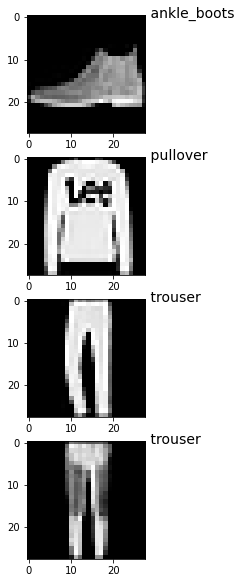

In [295]:
model_aug = Model_definition()
model_aug.load_weights('./model2.h5')   
pyplot.gcf().set_size_inches(4, 1)  
plot_predictions(np.squeeze(X_test[:4]), model_aug.predict(X_test[:4]))

### PREDICTIONS FROM MODEL WITH Augmentation  

<Figure size 288x72 with 0 Axes>

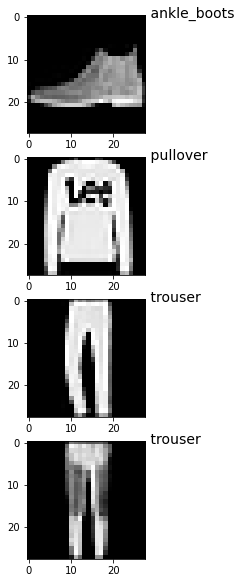

In [311]:
model_33 = Model_definition()
model_33.load_weights('./model3.h5')
pyplot.gcf().set_size_inches(4, 1)  
plot_predictions(np.squeeze(X_test[:4]), model_33.predict(X_test[:4]))

# Task 2

In [289]:
def pooling(img, pool_size, stride, type_of_pooling = 'max'):

    pools = []
    for i in np.arange(img.shape[0], step=stride):
        for j in np.arange(img.shape[0], step=stride):
            
            min_pool = img[i:i+pool_size, j:j+pool_size]
            if min_pool.shape == (pool_size, pool_size):
                pools.append(min_pool)

    pooled = []
    pooling_type = np.max
    if type_of_pooling == 'avg':
        pooling_type = np.mean
    for pool in pools:
        pooled.append(pooling_type(pool))
        
    return np.array(pooled).reshape((int(np.sqrt(np.array(pools).shape[0])), int(np.sqrt(np.array(pools).shape[0]))))

### TEST ON NUMBERS

In [290]:
array = np.array([[1,2,1,2,6,7],[3,4,6,7,3,4],[1,2,1,9,7,8],[1,2,1,7,2,4],[1,2,1,2,6,7],[1,2,1,2,6,7]])
print(array.shape)

(6, 6)


In [291]:
print(array)

[[1 2 1 2 6 7]
 [3 4 6 7 3 4]
 [1 2 1 9 7 8]
 [1 2 1 7 2 4]
 [1 2 1 2 6 7]
 [1 2 1 2 6 7]]


In [292]:
test = pooling(array, 2, 2, 'avg')
test

array([[2.5 , 4.  , 5.  ],
       [1.5 , 4.5 , 5.25],
       [1.5 , 1.5 , 6.5 ]])

In [246]:
test = pooling(array, 2, 2, 'max')
test

array([[4, 7, 7],
       [2, 9, 8],
       [2, 2, 7]])

In [248]:
test = pooling(array, 3, 3, 'avg')
test

array([[2.33333333, 5.88888889],
       [1.33333333, 4.77777778]])

In [249]:
test = pooling(array, 3, 3, 'max')
test

array([[6, 9],
       [2, 7]])

### PICTURES

### ORGINAL

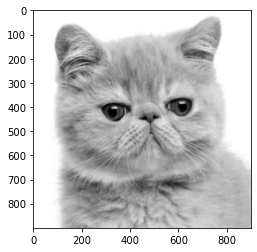

In [274]:
img = cv2.imread('kot5.jpg')
imgGray = color.rgb2gray(img)
plt.imshow(imgGray, cmap='gray')
plt.show()

### MAX POOLING

shape before: (900, 900)
shape before: (450, 450)


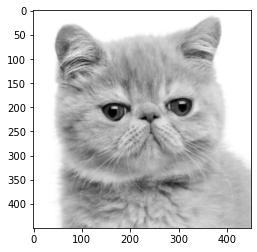

In [275]:
print("shape before: " + str(imgGray.shape))
img = pooling(imgGray, 2, 2,  'max')
print("shape before: " + str(img.shape))
plt.imshow(img, cmap='gray')
plt.show()

shape before: (900, 900)
shape before: (90, 90)


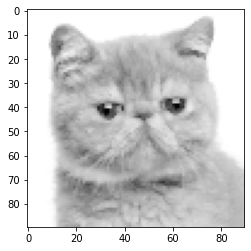

In [276]:
print("shape before: " + str(imgGray.shape))
img = pooling(imgGray, 10, 10,  'max')
print("shape before: " + str(img.shape))
plt.imshow(img, cmap='gray')
plt.show()

### AVG POOLING

shape before: (900, 900)
shape before: (450, 450)


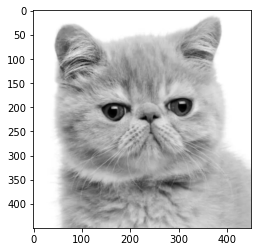

In [277]:
print("shape before: " + str(imgGray.shape))
img = pooling(imgGray, 2, 2,  'avg')
print("shape before: " + str(img.shape))
plt.imshow(img, cmap='gray')
plt.show()

shape before: (900, 900)
shape before: (90, 90)


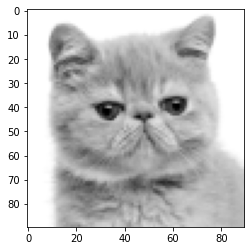

In [278]:
print("shape before: " + str(imgGray.shape))
img = pooling(imgGray, 10, 10,  'avg')
print("shape before: " + str(img.shape))
plt.imshow(img, cmap='gray')
plt.show()